<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/hw02_Lagarde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 Classification
## Alex Lagarde
### 3/28/2021

## Imported Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## PEP Classification 

### a. Loading in dataset and preprocessing

In [ ]:
df = pd.read_csv('bank_data.csv')
df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [ ]:
y = df['pep']
X = df.drop(['id', 'pep'], axis = 1)
X = pd.get_dummies(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = 0.2,
                                                random_state = 2)

### b. K Nearest Neighbors Personal Equity Plan Classifier




In [ ]:
def min_max(x):
  return (x-Xtrain.min()) / (Xtrain.max() - Xtrain.min())
Xtrain.apply(min_max)
Xtest.apply(min_max)
model = KNeighborsClassifier(n_neighbors='1', 
                             metric='euclidean', 
                             weights='uniform')

In [ ]:
parameters = {'n_neighbors' : np.arange(1,51),
              'metric' : ['euclidean', 'manhattan'],
              'weights' : ['uniform', 'distance']}
grid = GridSearchCV(model,  parameters, cv=5)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors='1', p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

              precision    recall  f1-score   support

          NO       0.55      0.75      0.63        61
         YES       0.58      0.36      0.44        59

    accuracy                           0.56       120
   macro avg       0.57      0.56      0.54       120
weighted avg       0.57      0.56      0.54       120



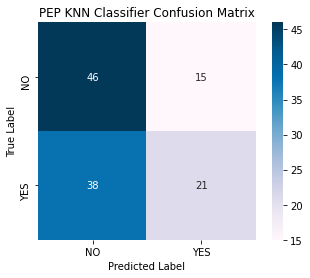

In [ ]:
model = grid.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(classification_report(ytest, ypred))
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, 
            annot=True,
            square =True,
            cmap = 'PuBu',
            xticklabels = model.classes_,
            yticklabels = model.classes_)
plt.title('PEP KNN Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 46, 'weights': 'uniform'}

After using a cross validation grid search on three hyperparameters within a K nearest neighbors classifier model, the algorithms found a 46 nearest neighbors classifier model with an euclidean distance metric and uniform weights yielded the optimal accuracy performance. This means the predicted class of whether a customer bought a personal equity plan, for unseen data, will depend on a majority vote of the 46 closest previously seen customers, which is determined by euclidean distance in the feature space. 

### c. Random Forest Personal Equity Plan Classifier

In [ ]:
nvals = np.arange(1,201)
best_n_estimators = []
for n in nvals:
    ensemble = RandomForestClassifier(n_estimators=n,
                                    criterion='entropy',
                                    random_state = 2)
    ensemble.fit(Xtrain, ytrain)
    preds = ensemble.predict(Xtest)
    acc = accuracy_score(ytest, preds)
    best_n_estimators.append(acc)
    
best_nidx = np.argmax(best_n_estimators)
best_n = nvals[best_nidx]
print('Best n_estimators =', best_n)

Best n_estimators = 134


In [ ]:
ensemble = RandomForestClassifier(n_estimators=134, 
                                criterion='entropy', 
                                random_state=2)
ensemble.fit(Xtrain, ytrain)
train_preds = ensemble.predict(Xtrain)
test_preds = ensemble.predict(Xtest)
cm2 = confusion_matrix(ytest, preds)
print('Training Data: \n', classification_report(ytrain, train_preds))
print('Testing Data: \n', classification_report(ytest, test_preds))

Training Data: 
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00       265
         YES       1.00      1.00      1.00       215

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Testing Data: 
               precision    recall  f1-score   support

          NO       0.76      0.93      0.84        61
         YES       0.91      0.69      0.79        59

    accuracy                           0.82       120
   macro avg       0.84      0.81      0.81       120
weighted avg       0.83      0.82      0.81       120



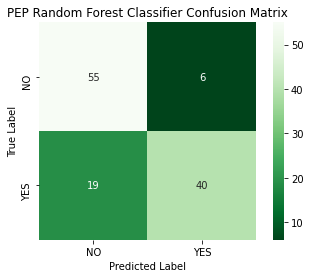

In [ ]:
sns.heatmap(cm2, 
            cmap = 'Greens_r',
            annot = True,
            square = True,
            xticklabels = ensemble.classes_,
            yticklabels = ensemble.classes_)
plt.title('PEP Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy score is a metric that tracks the proportion of times the model predicted correctly over the total entries in the training or testing data. The accuracy score of the training set is 100%, while the the accuracy score of the testing data is 82%. This discrepancy in the random forest shows a clear overfit. This could be due to the maximum depth parameter. If I chose a smaller maximum depth, the model could be more generalizable. The overfit is clear because the model is perfect at predicting classes using the data it trained on, and the model accuracy drops 18% when using unseen testing data. This drop off indicates the model follows every detail rather than the big picture.

### c. Naive Bayes Personal Equity Plan Classifier

In [ ]:
clf = GaussianNB()
clf.fit(Xtrain, ytrain)
NBTrain_Preds = clf.predict(Xtrain)
NBTest_Preds = clf.predict(Xtest)
cm3 = confusion_matrix(ytest, NBTest_Preds)
print('Training Data: \n', classification_report(ytrain, NBTrain_Preds))
print('Testing Data: \n', classification_report(ytest, NBTest_Preds))

Training Data: 
               precision    recall  f1-score   support

          NO       0.66      0.75      0.70       265
         YES       0.63      0.52      0.57       215

    accuracy                           0.65       480
   macro avg       0.64      0.64      0.64       480
weighted avg       0.65      0.65      0.64       480

Testing Data: 
               precision    recall  f1-score   support

          NO       0.60      0.84      0.70        61
         YES       0.71      0.42      0.53        59

    accuracy                           0.63       120
   macro avg       0.66      0.63      0.62       120
weighted avg       0.66      0.63      0.62       120



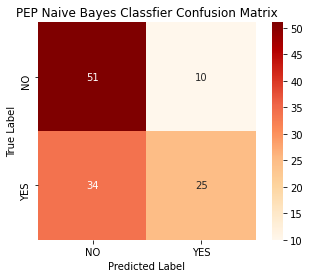

In [ ]:
sns.heatmap(cm3, 
            cmap = 'OrRd',
            annot = True,
            square = True,
            xticklabels = clf.classes_,
            yticklabels = clf.classes_)
plt.title('PEP Naive Bayes Classfier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The naive bayes classifier has similar accuracy score results when predicting with training data and when predicting with testing data. The training data is 65% accurate on predictions, while the testing data is 63% accurate. This may indicate a slight overfit. However, I expect the training data to outperform the testing data slightly as it is the data the algorithm learned on. 

#### d. PEP Classifer Observations
The random forest classifer definitely outperforms when predicting the testing data. Precisely, the random forest is 82% accurate compared to the naive bayes' 65% accuracy and to the K nearest neighbors 56% accuracy. Although the random forest is overfit, it still appears to be a more reliable model. One area of concern might be the yes recall. Since recall is the proportion of times when the label is the true label and is the predicted label, the random forest might need to be monitored on that front. This could be a further effect from maximum depth. In comparison, both the K nearest neighbors and naive bayes classifiers also performed worse with yes recall. 

## Census Data 

#### a. Preprocessing and Data Analysis

In [ ]:
# handling categorical missing values
df2 = pd.read_csv('adult-modified.csv')
print(df2.dtypes)
print(df2.isnull().sum())
print(df2['workclass'].unique())
print(df2['marital-status'].unique())
print(df2['race'].unique())
print(df2['sex'].unique())
print(df2['income'].unique())
df2 = df2[df2['workclass'] != '?']

age               object
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object
age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64
['Public' 'Self-emp' 'Private' '?']
['Single' 'Married']
['White' 'Black' 'Asian' 'Amer-Indian' 'Hispanic']
['Male' 'Female']
['<=50K' '>50K']


In [ ]:
# handling numeric missing values
print(df2.describe())
age = df2['age']
bad = age.str.contains('[^0-9.-]')
good = ~bad
df_clean = df2[good]
df_clean = df_clean.copy()
df_clean['age'] = df_clean['age'].astype(int)
age_average = df_clean['age'].mean()

         education  hours-per-week
count  9412.000000     9412.000000
mean     10.125266       41.080217
std       2.542118       11.884590
min       1.000000        1.000000
25%       9.000000       40.000000
50%      10.000000       40.000000
75%      13.000000       45.000000
max      16.000000       99.000000


In [ ]:
# using average as replacement for missing values 
df2['age'][bad] = age_average
df2 = df2.copy()
df2['age'] = df2['age'].astype(int)

### Attribute Characteristics

In [ ]:
df2.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.357310,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962135,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


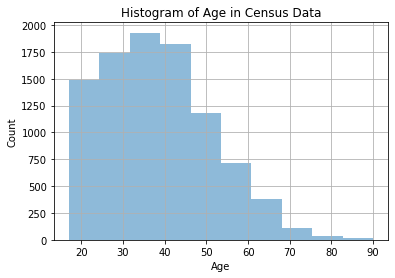

In [ ]:
df2.hist(column=['age'], bins=10, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age in Census Data')
plt.show()

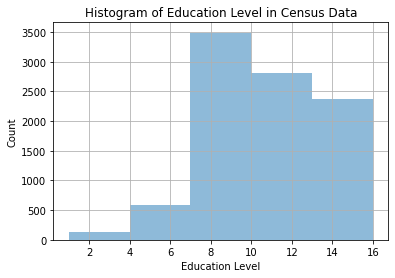

In [ ]:
df2.hist(column=['education'], bins=5, alpha=0.5)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Histogram of Education Level in Census Data')
plt.show()

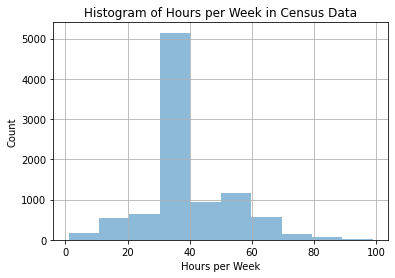

In [ ]:
df2.hist(column=['hours-per-week'], bins=10, alpha=0.5)
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Histogram of Hours per Week in Census Data')
plt.show()

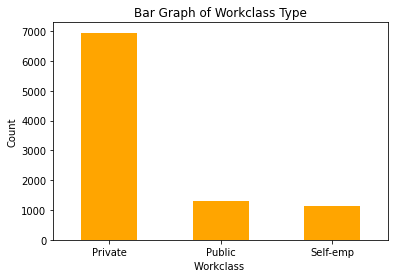

In [ ]:
df2["workclass"].value_counts().plot(kind='bar', color = 'orange', rot = 0)
plt.title('Bar Graph of Workclass Type')
plt.xlabel('Workclass ')
plt.ylabel('Count')
plt.show()

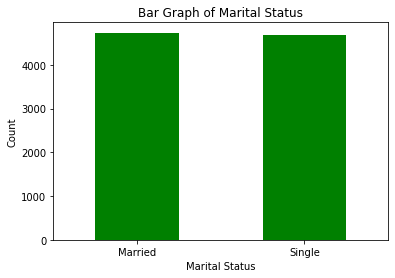

In [ ]:
df2["marital-status"].value_counts().plot(kind='bar', color = 'green', rot = 0)
plt.title('Bar Graph of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

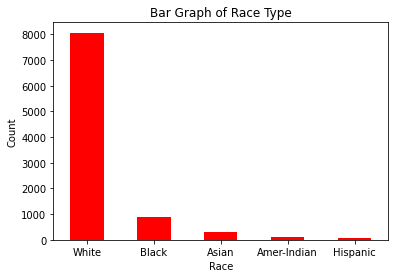

In [ ]:
df2["race"].value_counts().plot(kind='bar', color = 'red', rot = 0)
plt.title('Bar Graph of Race Type')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

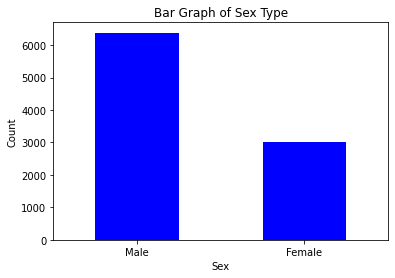

In [ ]:
df2["sex"].value_counts().plot(kind='bar', color = 'blue', rot = 0)
plt.title('Bar Graph of Sex Type')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

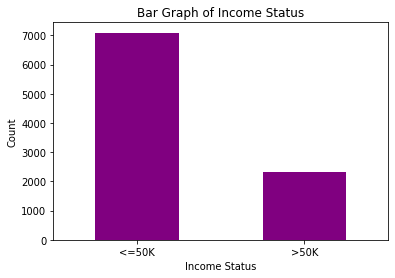

In [ ]:
df2["income"].value_counts().plot(kind='bar', color = 'purple', rot = 0)
plt.title('Bar Graph of Income Status')
plt.xlabel('Income Status')
plt.ylabel('Count')
plt.show()

### Cross Tabulations

In [ ]:
edu_race = pd.crosstab(df2["education"], df2["race"])
edu_race

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


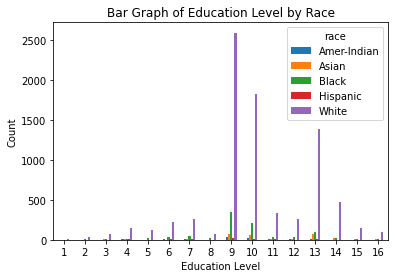

In [ ]:
edu_race.plot(kind='bar', rot = 0)
plt.title('Bar Graph of Education Level by Race')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [ ]:
workclass_income = pd.crosstab(df2["workclass"], df2["income"])
workclass_income

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


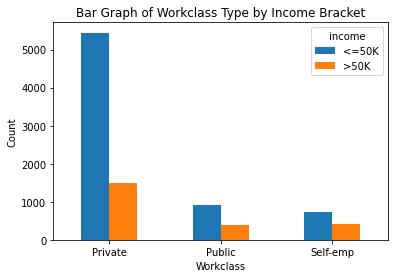

In [ ]:
workclass_income.plot(kind='bar', rot = 0)
plt.title('Bar Graph of Workclass Type by Income Bracket')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

In [ ]:
workclass_race = pd.crosstab(df2["workclass"], df2["race"])
workclass_race

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


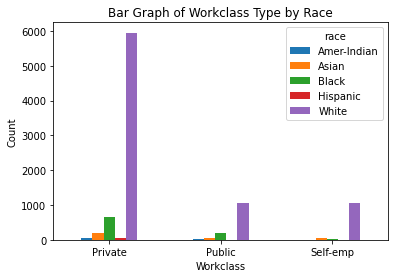

In [ ]:
workclass_race.plot(kind='bar', rot = 0)
plt.title('Bar Graph of Workclass Type by Race')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

In [ ]:
race_income = pd.crosstab(df2["race"], df2["income"])
race_income

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


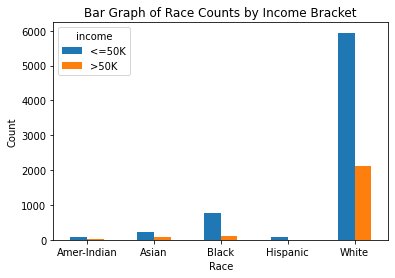

In [ ]:
race_income.plot(kind='bar', rot = 0)
plt.title('Bar Graph of Race Counts by Income Bracket')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [ ]:
race_income['percent_low_income'] = race_income['<=50K'] / (race_income['<=50K'] + race_income['>50K'])
race_income

income,<=50K,>50K,percent_low_income
race,,,
Amer-Indian,83,9,0.902174
Asian,224,67,0.769759
Black,773,119,0.866592
Hispanic,69,6,0.920000
White,5944,2118,0.737286


Observations


*   The largest group of people, for each race, reach up to an education level of 9, but the white race appear to have more of a chance to pursue higher levels of education as the race has the only very visible bars after 9.
*   Since there is a larger group in this census data who are below 50k, of the people who are above 50k, there are a greater amount who work in private work class. Private work class seems to lead to more income in general. However, proportionately it seems more likely to be below. 
*  Races besides the white race do not appear to have self employed work like the white race. It seems they are at least 10 times more likely to be white if self employed.
*   The white race has the most high income people and the most low income people. However, it appears to be less diproportionate in comparison to other races. 
* White race has a less of percentage of its people in the low income. Black, Hispanic, and Native American people are low income more than 86% of the time respectively.



### Little Further Analysis

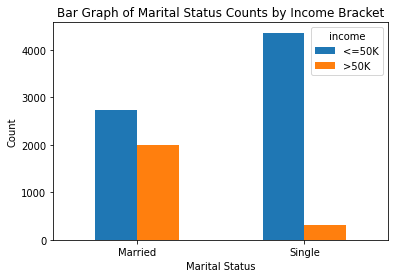

In [ ]:
marital_income = pd.crosstab(df2["marital-status"], df2["income"])
marital_income.plot(kind='bar', rot = 0)
plt.title('Bar Graph of Marital Status Counts by Income Bracket')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

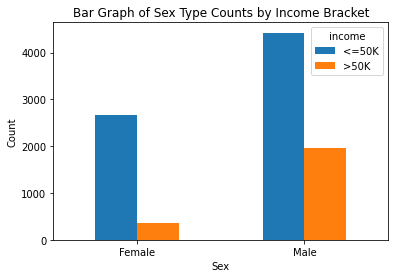

In [ ]:
marital_income = pd.crosstab(df2["sex"], df2["income"])
marital_income.plot(kind='bar', rot = 0)
plt.title('Bar Graph of Sex Type Counts by Income Bracket')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


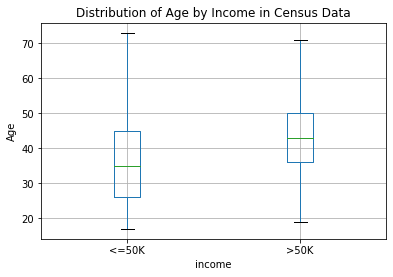

In [ ]:
df2.boxplot(by='income', column='age', showfliers=False) 
plt.ylabel('Age')
plt.xlabel('Income')
plt.title('Distribution of Age by Income in Census Data')
plt.suptitle('') 
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


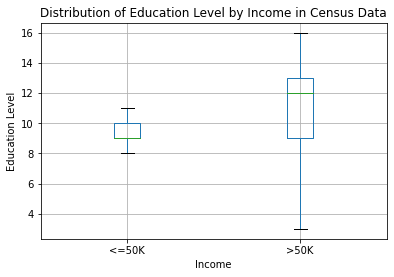

In [ ]:
df2.boxplot(by='income', column='education', showfliers=False) 
plt.ylabel('Education Level')
plt.xlabel('Income')
plt.title('Distribution of Education Level by Income in Census Data')
plt.suptitle('') 
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


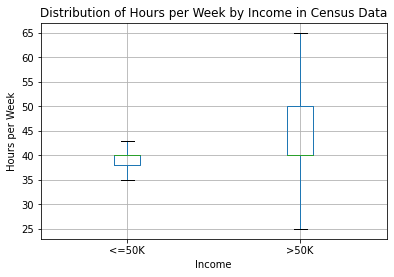

In [ ]:
df2.boxplot(by='income', column='hours-per-week', showfliers=False) 
plt.ylabel('Hours per Week')
plt.xlabel('Income')
plt.title('Distribution of Hours per Week by Income in Census Data')
plt.suptitle('') 
plt.show()

Comparing and Contrasting Low Income vs High Income People

The high income people tend to work longer hours, to have a bit more of an education, to be a bit older, to be disproportionately white, to be disproportionately male, and to be married. On the other hand, low income people do appear to work less hours, to have a little less of an education, to be a little younger, to be white, to be male, and to be single. When looking at proportions, it is clear that other races and females are more likely to be low income than whites and males respectively. As for working class, the category seems a bit more difficult to generalize with basic EDA.




### b. Predictive Modeling and Model Evaluation

In [ ]:
df2 = pd.get_dummies(df2)
y2 = df2['income_>50K']
X2 = df2.drop(['income_>50K', 'income_<=50K'], axis=1)

#### K Nearest Neighbors Classifier High Income

In [ ]:
xknntrain, xknntest, yknntrain, yknntest = train_test_split(X2,
                                                            y2,
                                                            test_size=0.2,
                                                            random_state=2) 
def min_max2(x):
  return (x-xknntrain.min()) / (xknntrain.max() - xknntrain.min())
xknntrain.apply(min_max)
xknntest.apply(min_max)
knn = KNeighborsClassifier(n_neighbors='1', 
                             metric='euclidean', 
                             weights='uniform')

In [ ]:
knn_params = {'n_neighbors': np.arange(1,51),
              'metric' : ['euclidean', 'manhattan'],
              'weights': ['distance', 'uniform']}
grid2 = GridSearchCV(knn, knn_params, cv=5)
grid2.fit(xknntrain, yknntrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors='1', p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn = grid2.best_estimator_
knn.fit(xknntrain, yknntrain)
knn_train_preds = knn.predict(xknntrain)
knn_test_preds = knn.predict(xknntest)
print('Training Data: \n', classification_report(yknntrain, knn_train_preds))
print('Testing Data: \n', classification_report(yknntest, knn_test_preds))

Training Data: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      5662
           1       0.69      0.49      0.58      1867

    accuracy                           0.82      7529
   macro avg       0.77      0.71      0.73      7529
weighted avg       0.81      0.82      0.81      7529

Testing Data: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1431
           1       0.62      0.47      0.53       452

    accuracy                           0.80      1883
   macro avg       0.73      0.69      0.70      1883
weighted avg       0.79      0.80      0.79      1883



#### Random Forest Classifier High Income

In [ ]:
xrandom_train, xrandom_test, yrandom_train, yrandom_test = train_test_split(X2,
                                                                            y2,
                                                                            test_size = 0.8,
                                                                            random_state = 2)

In [ ]:
nvals2 = np.arange(1,50)
best_n_estimators2 = []
for n in nvals2:
    ensemble2 = RandomForestClassifier(n_estimators=n,
                                    criterion='entropy',
                                    random_state = 2)
    ensemble2.fit(xrandom_train, yrandom_train)
    rf_preds = ensemble2.predict(xrandom_test)
    acc = accuracy_score(yrandom_test, rf_preds)
    best_n_estimators2.append(acc)

best_nidx2 = np.argmax(best_n_estimators2)
best_n2 = nvals2[best_nidx2]
print('Best n_estimators =', best_n2)

In [ ]:
ensemble2 = RandomForestClassifier(n_estimators=12,
                                   criterion='entropy',
                                   random_state=2)
ensemble2.fit(xrandom_train, yrandom_train)
rf_train_preds = ensemble2.predict(xrandom_train)
rf_test_preds = ensemble2.predict(xrandom_test)
print('Training Data: \n', classification_report(yrandom_train, rf_train_preds))
print('Testing Data: \n', classification_report(yrandom_test, rf_test_preds))


Training Data: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1399
           1       0.93      0.89      0.91       483

    accuracy                           0.95      1882
   macro avg       0.95      0.94      0.94      1882
weighted avg       0.95      0.95      0.95      1882

Testing Data: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      5694
           1       0.57      0.53      0.55      1836

    accuracy                           0.79      7530
   macro avg       0.71      0.70      0.71      7530
weighted avg       0.78      0.79      0.79      7530



#### Naive Bayes Classifier High Income

In [ ]:
xNBtrain, xNBtest, yNBtrain, yNBtest = train_test_split(X2, 
                                                        y2,
                                                        test_size = 0.8,
                                                        random_state = 2)
clf2 = GaussianNB()
clf2.fit(xNBtrain, yNBtrain)
NBtrain_preds = clf2.predict(xNBtrain)
NBtest_preds = clf2.predict(xNBtest)
print('Training Data: \n', classification_report(yNBtrain, NBtrain_preds))
print('Testing Data: \n', classification_report(yNBtest, NBtest_preds))

Training Data: 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      1399
           1       0.46      0.75      0.57       483

    accuracy                           0.71      1882
   macro avg       0.67      0.72      0.67      1882
weighted avg       0.78      0.71      0.72      1882

Testing Data: 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      5694
           1       0.46      0.78      0.58      1836

    accuracy                           0.72      7530
   macro avg       0.68      0.74      0.68      7530
weighted avg       0.80      0.72      0.74      7530



### Observations
The K nearest neighbors classifier outperformed the other classifier models. With an accuracy score of 80% on its testing data, it was the most generalizable to unseen data. The 1% percent drop off from the training data and testing data results for the k nearest neighbors is normal considering how training data is used to learn the model. The model slightly beat out the random forest classifier with an accuracy of 79% on the testing data. When the model predicted the training it was 95% accurate, which indicates an overfitting problem likely caused by the maximum depth parameter. On the other hand, the naive bayes classifier was less generalizable at an accuracy of 72% on its testing data. The testing data predicted better than the training data, which signifies a slight underfit. There is some general variability the model is missing. Overall, it appears again that the recall for yes above 50k income is where the models struggled. This is likely due to how the sample size had a  lot more observations that were less than 50k income tha above 50k. This bias can throw off the model and make it harder for the algorithms to detect subtle differences between the above 50k and below 50k.